In [25]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [26]:
# Load sleep_data set into pandas
sleep_data = pd.read_csv("resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [27]:
# No Null Values
# Identify types
sleep_data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

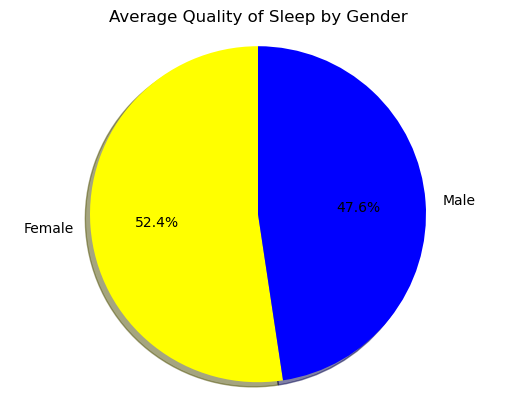

In [41]:
# updated pie chart for Lydia
gender_sleep = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()
genders = ["Female", "Male"]
quality_sleep = gender_sleep
colors = ["yellow", "blue"]
plt.title("Average Quality of Sleep by Gender")
plt.pie(quality_sleep, labels=genders, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("images/PieChart_AvgQualitySleepGender.png")
plt.show

In [28]:
# The average Physical Activity Level, sleep duration, and sleep quality for the sample
average_activity = sleep_data["Physical Activity Level"].mean()
average_sleep_duration = sleep_data["Sleep Duration"].mean()
average_sleep_quality = sleep_data["Quality of Sleep"].mean()

print(average_activity, average_sleep_duration, average_sleep_quality)


59.17112299465241 7.132085561497325 7.31283422459893


In [29]:
# The average Physical Activity Level, sleep duration, and sleep quality per Gender
per_gender_activity = sleep_data.groupby(["Gender"])["Physical Activity Level"].mean()
per_gender_duration = sleep_data.groupby(["Gender"])["Sleep Duration"].mean()
per_gender_quality = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()

# create data frames for each variable
pd.DataFrame(per_gender_activity)
pd.DataFrame(per_gender_duration)
pd.DataFrame(per_gender_quality)

# merge data frames
gender_averages_df = pd.merge(per_gender_quality, per_gender_duration, on="Gender")
gender_averages_df = pd.merge(gender_averages_df, per_gender_activity, on="Gender")
gender_averages_df

,Quality of Sleep,Sleep Duration,Physical Activity Level
Gender,,,
Female,7.664865,7.229730,59.140541
Male,6.968254,7.036508,59.201058


In [30]:
print(per_gender_activity, per_gender_duration, per_gender_quality)

Gender
Female    59.140541
Male      59.201058
Name: Physical Activity Level, dtype: float64 Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64 Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64


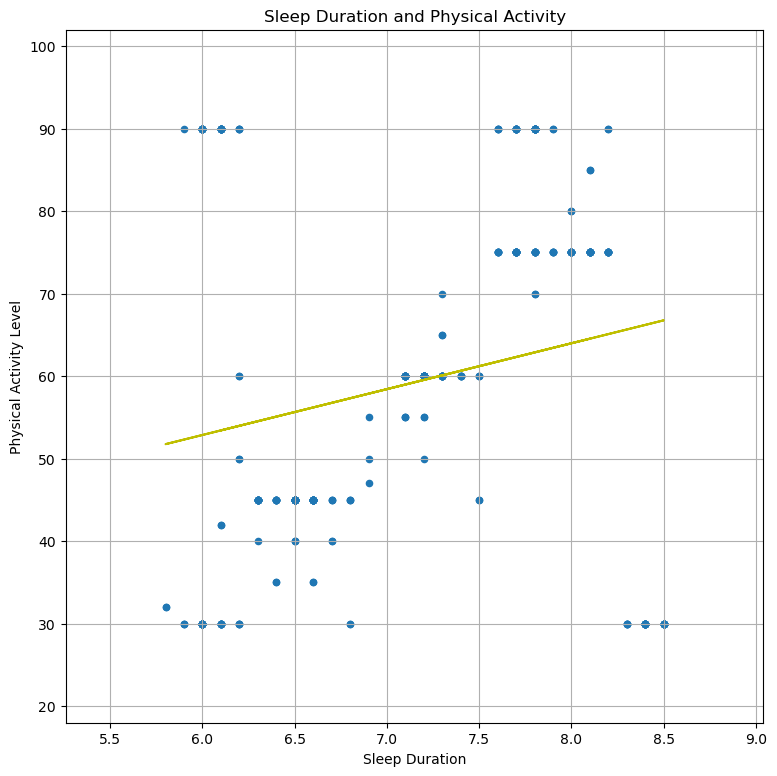

5.559729276558028


In [31]:
# create Sleep Duration and Physical Activity Level scatter plot 
sleep_data.plot(kind="scatter", x="Sleep Duration", y="Physical Activity Level", grid=True, figsize=(9,9),
              title="Sleep Duration and Physical Activity")
plt.xticks(np.arange(min(x_values - 3.3), max(x_values)+1.2, .5))

x_values = sleep_data['Sleep Duration']
y_values = sleep_data['Physical Activity Level']


slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"y-")


  #plt.xticks(np.arange(min(x), max(x)+1, .5))
# Pad margins so that markers don't get 
# clipped by the axes
plt.margins(0.2)
plt.savefig("images/activity_sleep_duration_scatter.png")
plt.show()
print(slope)
#change x values

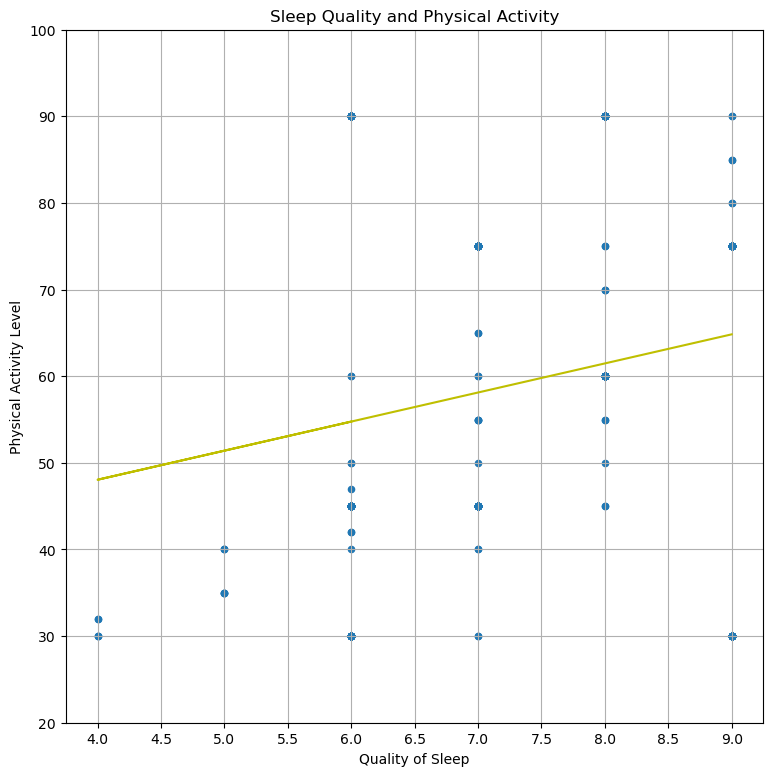

3.3570059790358404


In [32]:
# create Sleep Quality and Physical Activity Level scatter plot 
sleep_data.plot(kind="scatter", x="Quality of Sleep", y="Physical Activity Level", grid=True, figsize=(9,9),
              title="Sleep Quality and Physical Activity")

x_values = sleep_data['Quality of Sleep']
y_values = sleep_data['Physical Activity Level']

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"y-")
plt.xticks(np.arange(min(x_values), max(x_values)+.5, .5))
plt.yticks(np.arange(min(y_values)-10, max(y_values)+20, 10))
plt.savefig("images/activity_sleep_quality_scatter.png")
plt.show()
print(slope)
# change x values

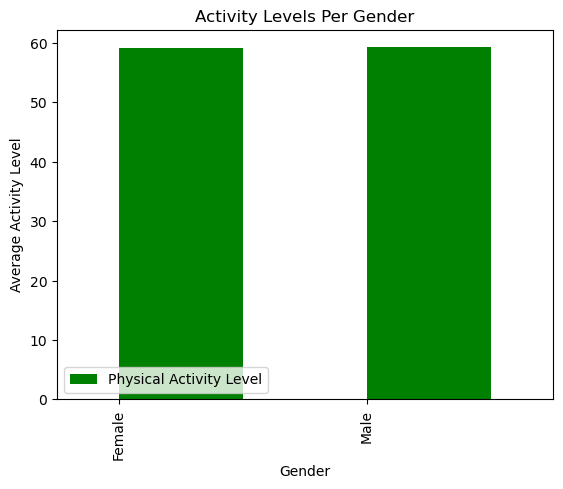

In [33]:
# Create bar chart for gender and activity levels
per_gender_activity.plot(kind='bar', color="green", legend="Activity Levels", align="edge")

plt.title("Activity Levels Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Activity Level")
plt.legend(loc=3)
plt.show()

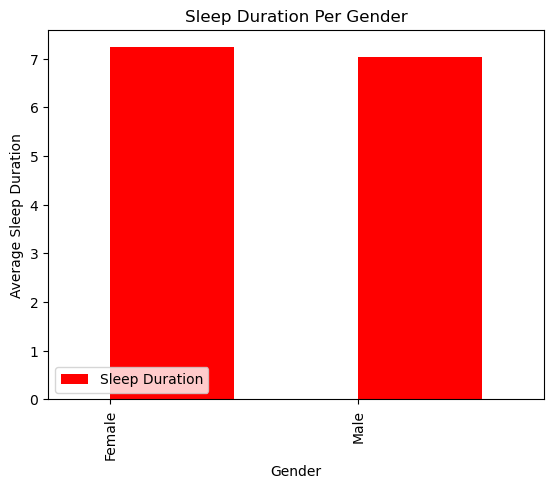

In [34]:
# bar chart for gender and average sleep duration
per_gender_duration.plot(kind='bar', color="red", legend="Sleep Duration", align="edge")

plt.title("Sleep Duration Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Sleep Duration")
plt.legend(loc=3)
plt.show()

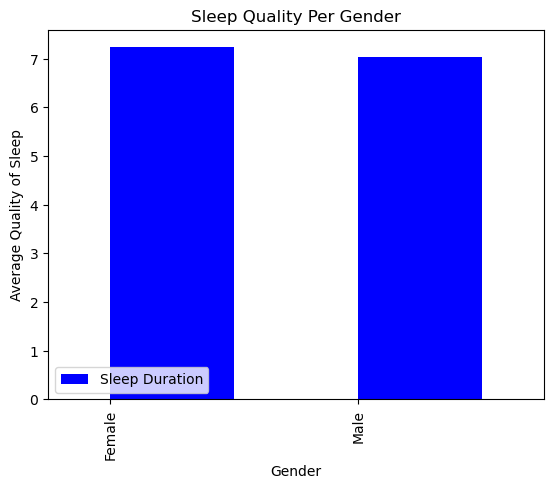

In [35]:
# bar chart for gender and average sleep duration
per_gender_duration.plot(kind='bar', color="blue", legend="Sleep Quality", align="edge")

plt.title("Sleep Quality Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Quality of Sleep")
plt.legend(loc=3)
plt.show()

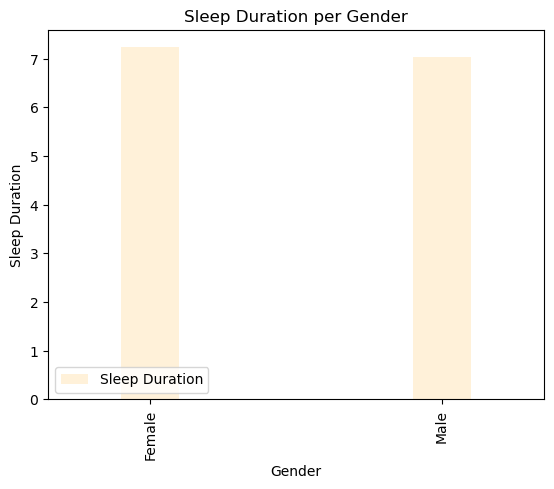

In [36]:

per_gender_duration.plot(kind='bar', color="orange", alpha=0.15, legend="Sleep Duration", align="center", width=0.2)

# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Sleep Duration per Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Duration")
plt.legend(loc=3)
plt.show()

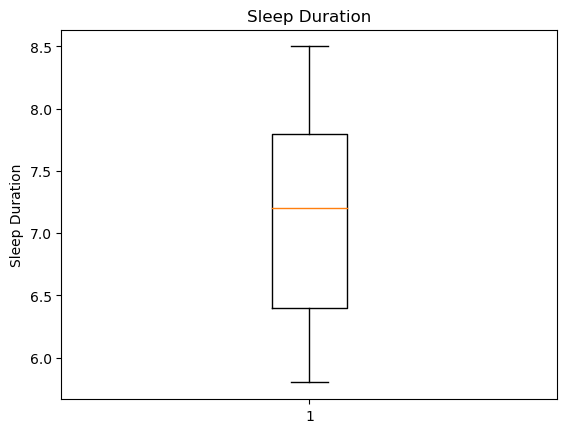

In [37]:
# box and whister plot
sleep_d = sleep_data['Sleep Duration']
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Duration')
ax1.set_ylabel('Sleep Duration')
ax1.boxplot(sleep_d)
plt.show()


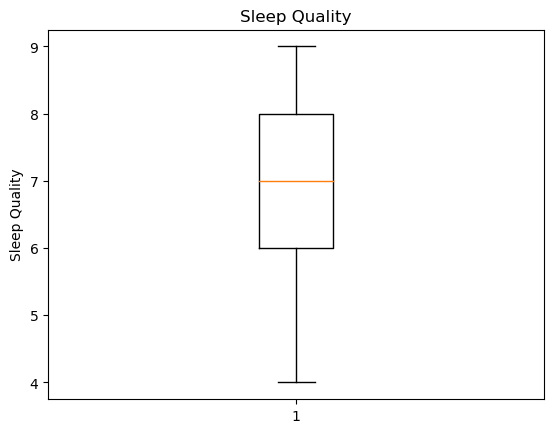

In [38]:
# box and whister plot
sleep_q = sleep_data['Quality of Sleep']
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Quality')
ax1.set_ylabel('Sleep Quality')

ax1.boxplot(sleep_q)
plt.show()


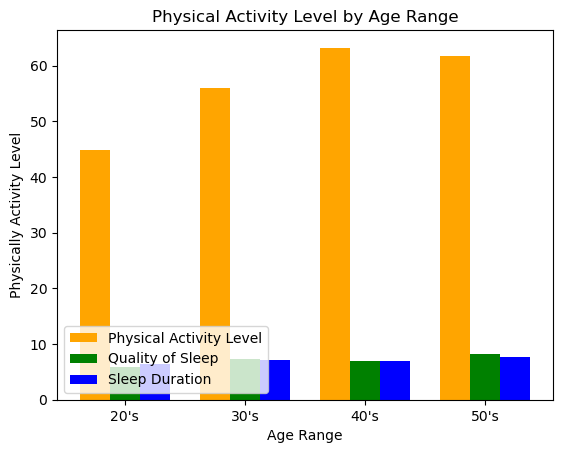

In [39]:
# Create bins
bins = [20, 29, 39, 49, 59]
age_labels = ["20s", "30s", "40s", "50s"]


# Slice the data and place it into bins
# Place the data series into a new column inside of the DataFrame
sleep_data["Age Range"] = pd.cut(sleep_data["Age"], bins, labels=age_labels)
sleep_data


#calculate the mean of stress level by age group
age_activity = sleep_data.groupby(["Age Range"])["Physical Activity Level"].mean()
age_activity

#calculate the mean of sleep duration by age group
age_sleep_duration = sleep_data.groupby(["Age Range"])["Sleep Duration"].mean()

age_sleep_quality = sleep_data.groupby(["Age Range"])["Quality of Sleep"].mean()


n = 4
ind = np.arange(n)
width = 0.25

bar1 = plt.bar(ind, age_activity, width, color="orange")
bar2 = plt.bar(ind+width, age_sleep_quality, width, color="green")
bar3 = plt.bar(ind+width*2, age_sleep_duration, width, color="blue")

plt.xlabel("Age Range")
plt.ylabel('Physically Activity Level')
plt.title("Physical Activity Level by Age Range")
  
plt.xticks(ind+width,["20's", "30's", "40's", "50's"])
plt.legend( (bar1, bar2, bar3), ('Physical Activity Level', 'Quality of Sleep', 'Sleep Duration'), loc=3)
plt.show()